# ML Pipeline Preparation 

### 1. Importing Libraries and loading data from database

In [80]:
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download(['punkt', 'wordnet', 'stopwords'])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/thiagomacedo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/thiagomacedo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thiagomacedo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
engine = create_engine('sqlite:///disasters.db')
df = pd.read_sql_table('disasters_messages', engine)
X = df.message
y = df.iloc[:, 4:]

### 2. Writing tokenization function to process text data

In [66]:
def tokenize(text):
    # make all text lowercase 
    text = text.lower()

    # remove all type of punctuations 
    text = re.sub(f'[^a-z0-9]',' ', text)

    # tokenize the text
    tokens = word_tokenize(text)

    # lemmatize the text
    tokens = [WordNetLemmatizer().lemmatize(w) for w in tokens]

    # remove stopwords
    tokens = [w for w in tokens if w not in stopwords.words('english')]
    
    return tokens

### 3. Building ML pipelines for each model

In [67]:
pipeline_rf = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('moc', MultiOutputClassifier(RandomForestClassifier()))
])

pipeline_nb = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('moc', MultiOutputClassifier(MultinomialNB()))
])

pipeline_ab = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('moc', MultiOutputClassifier(AdaBoostClassifier()))
])

### 4. Training the pipelines

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [69]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x7fa0ca7c8310>)),
                ('tfidf', TfidfTransformer()),
                ('moc',
                 MultiOutputClassifier(estimator=RandomForestClassifier()))])

In [76]:
pipeline_nb.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x7fa0ca7c8310>)),
                ('tfidf', TfidfTransformer()),
                ('moc', MultiOutputClassifier(estimator=MultinomialNB()))])

In [78]:
pipeline_ab.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(tokenizer=<function tokenize at 0x7fa0ca7c8310>)),
                ('tfidf', TfidfTransformer()),
                ('moc', MultiOutputClassifier(estimator=AdaBoostClassifier()))])

### 5. Evaluating the pipelines

In [72]:
def plot_scores(y_test, y_pred):
    i = 0
    for col in y_test:
        plt.title(f'Feature {i+1}: {col}')
        sns.heatmap(confusion_matrix(y_test[col], y_pred[:,i]), annot=True)
        plt.show()
        print(classification_report(y_test[col], y_pred[:, i], zero_division=0))
        i += 1
    accuracy = (y_test.values == y_pred).mean()
    print(f'accuracy: {accuracy}')

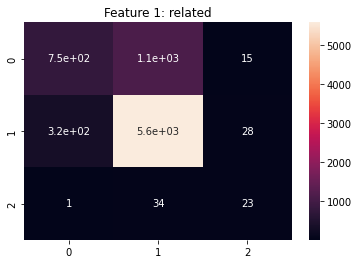

              precision    recall  f1-score   support

           0       0.70      0.40      0.51      1873
           1       0.83      0.94      0.88      5934
           2       0.35      0.40      0.37        58

    accuracy                           0.81      7865
   macro avg       0.63      0.58      0.59      7865
weighted avg       0.80      0.81      0.79      7865



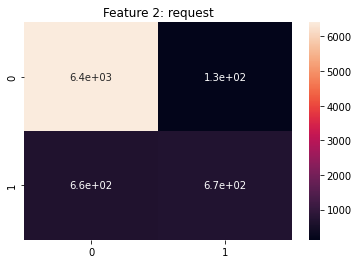

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6533
           1       0.84      0.50      0.63      1332

    accuracy                           0.90      7865
   macro avg       0.87      0.74      0.78      7865
weighted avg       0.89      0.90      0.89      7865



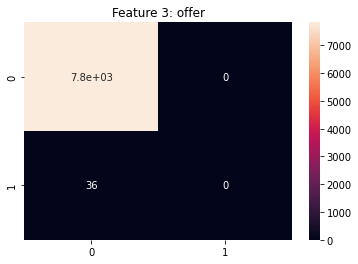

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7829
           1       0.00      0.00      0.00        36

    accuracy                           1.00      7865
   macro avg       0.50      0.50      0.50      7865
weighted avg       0.99      1.00      0.99      7865



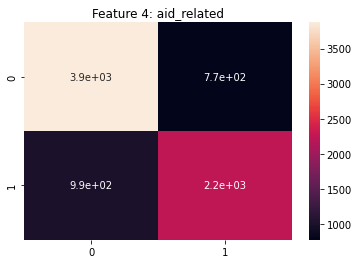

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      4646
           1       0.74      0.69      0.72      3219

    accuracy                           0.78      7865
   macro avg       0.77      0.76      0.77      7865
weighted avg       0.77      0.78      0.77      7865



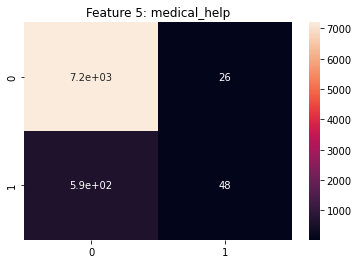

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7227
           1       0.65      0.08      0.13       638

    accuracy                           0.92      7865
   macro avg       0.79      0.54      0.55      7865
weighted avg       0.90      0.92      0.89      7865



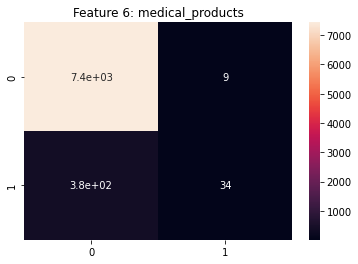

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7447
           1       0.79      0.08      0.15       418

    accuracy                           0.95      7865
   macro avg       0.87      0.54      0.56      7865
weighted avg       0.94      0.95      0.93      7865



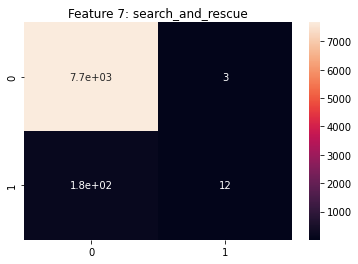

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7673
           1       0.80      0.06      0.12       192

    accuracy                           0.98      7865
   macro avg       0.89      0.53      0.55      7865
weighted avg       0.97      0.98      0.97      7865



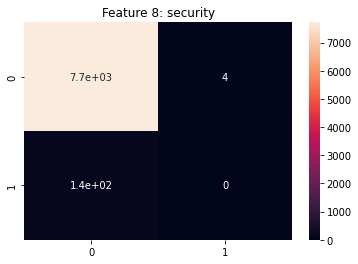

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7721
           1       0.00      0.00      0.00       144

    accuracy                           0.98      7865
   macro avg       0.49      0.50      0.50      7865
weighted avg       0.96      0.98      0.97      7865



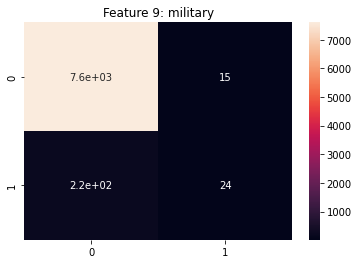

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7620
           1       0.62      0.10      0.17       245

    accuracy                           0.97      7865
   macro avg       0.79      0.55      0.58      7865
weighted avg       0.96      0.97      0.96      7865



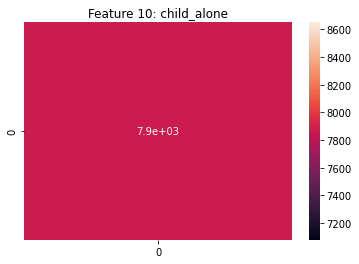

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7865

    accuracy                           1.00      7865
   macro avg       1.00      1.00      1.00      7865
weighted avg       1.00      1.00      1.00      7865



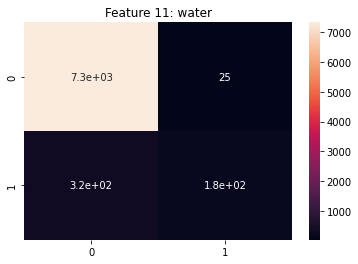

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7365
           1       0.88      0.37      0.52       500

    accuracy                           0.96      7865
   macro avg       0.92      0.68      0.75      7865
weighted avg       0.95      0.96      0.95      7865



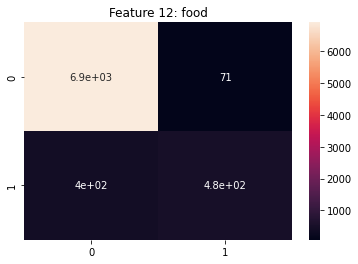

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6987
           1       0.87      0.54      0.67       878

    accuracy                           0.94      7865
   macro avg       0.91      0.77      0.82      7865
weighted avg       0.94      0.94      0.93      7865



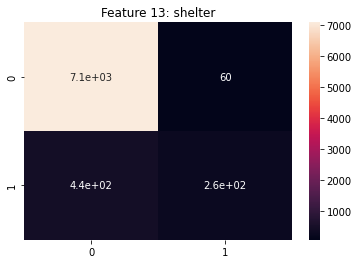

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      7160
           1       0.81      0.37      0.51       705

    accuracy                           0.94      7865
   macro avg       0.88      0.68      0.74      7865
weighted avg       0.93      0.94      0.92      7865



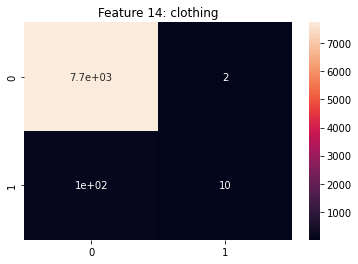

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7750
           1       0.83      0.09      0.16       115

    accuracy                           0.99      7865
   macro avg       0.91      0.54      0.58      7865
weighted avg       0.98      0.99      0.98      7865



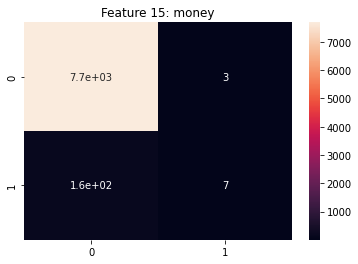

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7695
           1       0.70      0.04      0.08       170

    accuracy                           0.98      7865
   macro avg       0.84      0.52      0.53      7865
weighted avg       0.97      0.98      0.97      7865



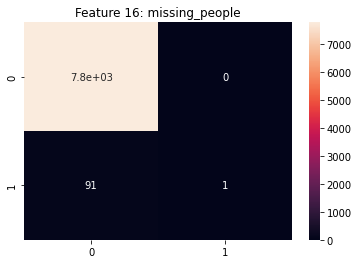

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7773
           1       1.00      0.01      0.02        92

    accuracy                           0.99      7865
   macro avg       0.99      0.51      0.51      7865
weighted avg       0.99      0.99      0.98      7865



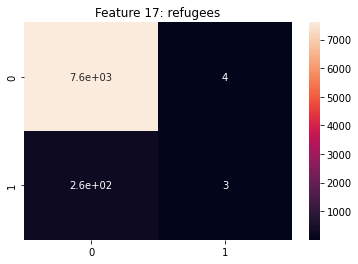

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7605
           1       0.43      0.01      0.02       260

    accuracy                           0.97      7865
   macro avg       0.70      0.51      0.50      7865
weighted avg       0.95      0.97      0.95      7865



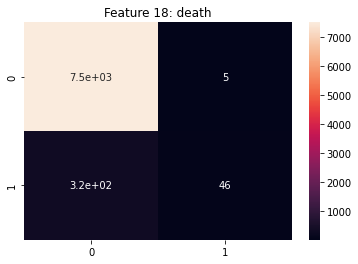

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7499
           1       0.90      0.13      0.22       366

    accuracy                           0.96      7865
   macro avg       0.93      0.56      0.60      7865
weighted avg       0.96      0.96      0.94      7865



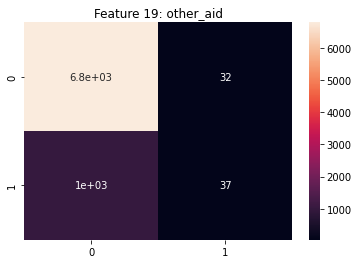

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      6832
           1       0.54      0.04      0.07      1033

    accuracy                           0.87      7865
   macro avg       0.70      0.52      0.50      7865
weighted avg       0.83      0.87      0.82      7865



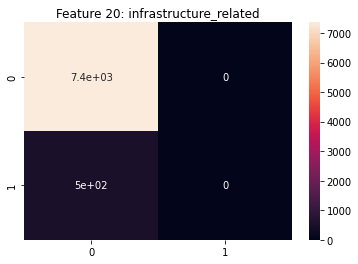

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7360
           1       0.00      0.00      0.00       505

    accuracy                           0.94      7865
   macro avg       0.47      0.50      0.48      7865
weighted avg       0.88      0.94      0.90      7865



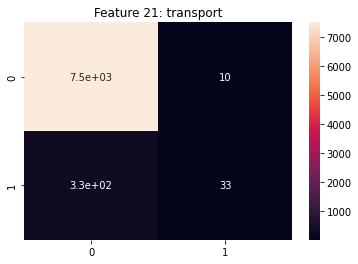

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7503
           1       0.77      0.09      0.16       362

    accuracy                           0.96      7865
   macro avg       0.86      0.54      0.57      7865
weighted avg       0.95      0.96      0.94      7865



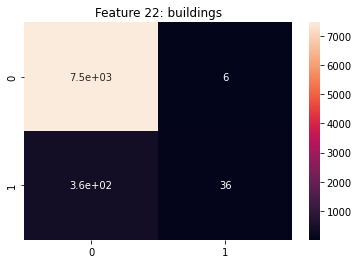

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      7473
           1       0.86      0.09      0.17       392

    accuracy                           0.95      7865
   macro avg       0.91      0.55      0.57      7865
weighted avg       0.95      0.95      0.94      7865



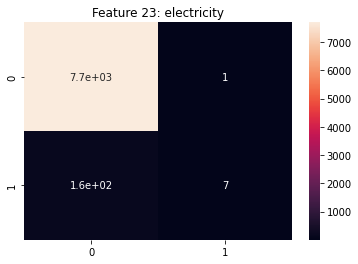

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7697
           1       0.88      0.04      0.08       168

    accuracy                           0.98      7865
   macro avg       0.93      0.52      0.53      7865
weighted avg       0.98      0.98      0.97      7865



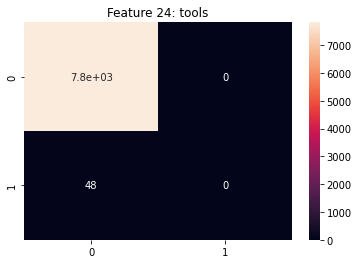

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7817
           1       0.00      0.00      0.00        48

    accuracy                           0.99      7865
   macro avg       0.50      0.50      0.50      7865
weighted avg       0.99      0.99      0.99      7865



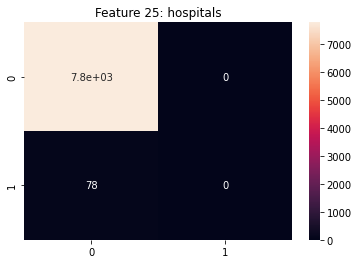

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7787
           1       0.00      0.00      0.00        78

    accuracy                           0.99      7865
   macro avg       0.50      0.50      0.50      7865
weighted avg       0.98      0.99      0.99      7865



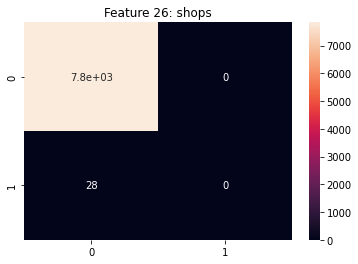

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7837
           1       0.00      0.00      0.00        28

    accuracy                           1.00      7865
   macro avg       0.50      0.50      0.50      7865
weighted avg       0.99      1.00      0.99      7865



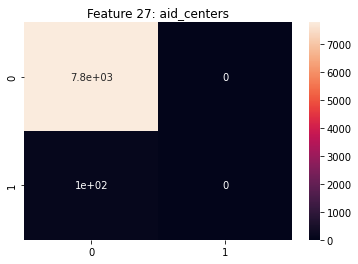

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7762
           1       0.00      0.00      0.00       103

    accuracy                           0.99      7865
   macro avg       0.49      0.50      0.50      7865
weighted avg       0.97      0.99      0.98      7865



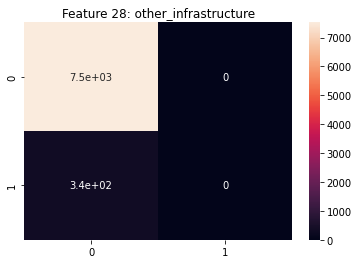

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7524
           1       0.00      0.00      0.00       341

    accuracy                           0.96      7865
   macro avg       0.48      0.50      0.49      7865
weighted avg       0.92      0.96      0.94      7865



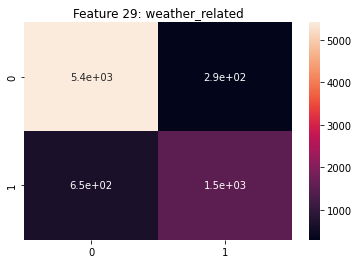

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5702
           1       0.84      0.70      0.76      2163

    accuracy                           0.88      7865
   macro avg       0.87      0.82      0.84      7865
weighted avg       0.88      0.88      0.88      7865



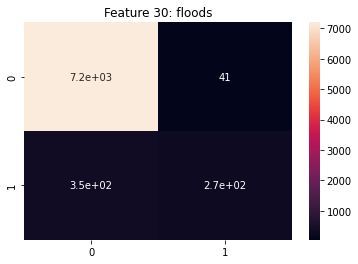

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7242
           1       0.87      0.43      0.58       623

    accuracy                           0.95      7865
   macro avg       0.91      0.71      0.78      7865
weighted avg       0.95      0.95      0.94      7865



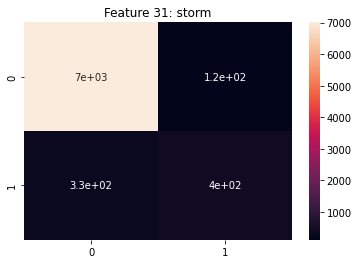

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7127
           1       0.77      0.55      0.64       738

    accuracy                           0.94      7865
   macro avg       0.86      0.77      0.81      7865
weighted avg       0.94      0.94      0.94      7865



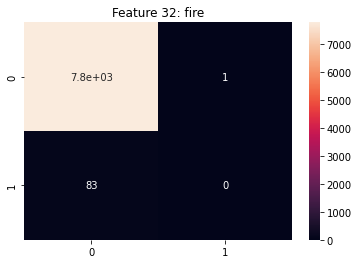

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7782
           1       0.00      0.00      0.00        83

    accuracy                           0.99      7865
   macro avg       0.49      0.50      0.50      7865
weighted avg       0.98      0.99      0.98      7865



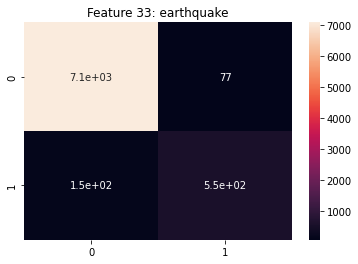

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7163
           1       0.88      0.79      0.83       702

    accuracy                           0.97      7865
   macro avg       0.93      0.89      0.91      7865
weighted avg       0.97      0.97      0.97      7865



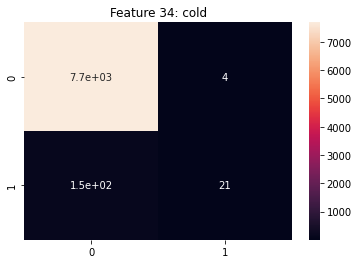

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7694
           1       0.84      0.12      0.21       171

    accuracy                           0.98      7865
   macro avg       0.91      0.56      0.60      7865
weighted avg       0.98      0.98      0.97      7865



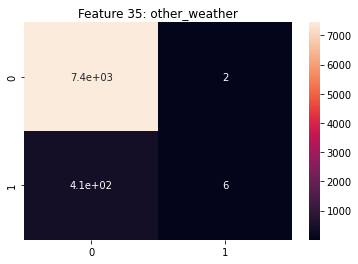

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7450
           1       0.75      0.01      0.03       415

    accuracy                           0.95      7865
   macro avg       0.85      0.51      0.50      7865
weighted avg       0.94      0.95      0.92      7865



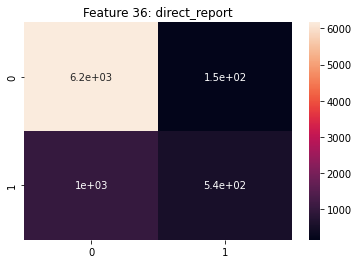

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      6321
           1       0.78      0.35      0.48      1544

    accuracy                           0.85      7865
   macro avg       0.82      0.66      0.70      7865
weighted avg       0.84      0.85      0.83      7865

accuracy: 0.9478844387935297


In [73]:
y_pred = pipeline_rf.predict(X_test)
plot_scores(y_test, y_pred)

**Random Forest Accuracy**: 0.947

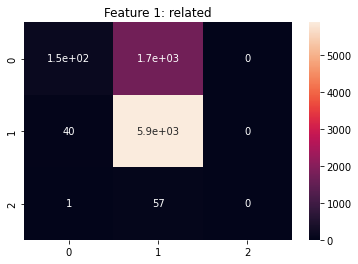

              precision    recall  f1-score   support

           0       0.79      0.08      0.15      1873
           1       0.77      0.99      0.87      5934
           2       0.00      0.00      0.00        58

    accuracy                           0.77      7865
   macro avg       0.52      0.36      0.34      7865
weighted avg       0.77      0.77      0.69      7865



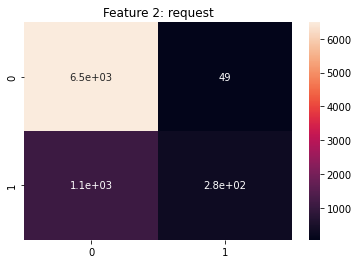

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6533
           1       0.85      0.21      0.33      1332

    accuracy                           0.86      7865
   macro avg       0.85      0.60      0.63      7865
weighted avg       0.86      0.86      0.82      7865



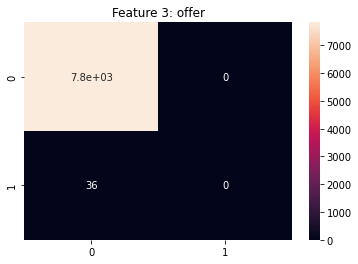

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7829
           1       0.00      0.00      0.00        36

    accuracy                           1.00      7865
   macro avg       0.50      0.50      0.50      7865
weighted avg       0.99      1.00      0.99      7865



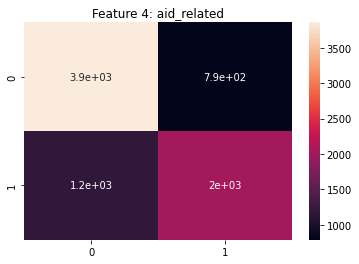

              precision    recall  f1-score   support

           0       0.76      0.83      0.80      4646
           1       0.72      0.63      0.67      3219

    accuracy                           0.75      7865
   macro avg       0.74      0.73      0.73      7865
weighted avg       0.75      0.75      0.75      7865



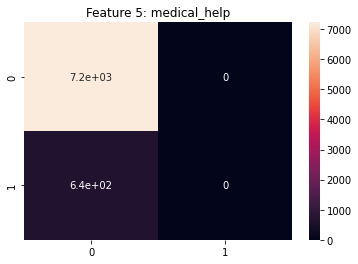

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7227
           1       0.00      0.00      0.00       638

    accuracy                           0.92      7865
   macro avg       0.46      0.50      0.48      7865
weighted avg       0.84      0.92      0.88      7865



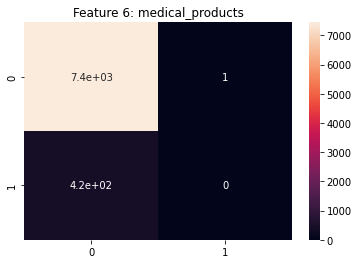

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7447
           1       0.00      0.00      0.00       418

    accuracy                           0.95      7865
   macro avg       0.47      0.50      0.49      7865
weighted avg       0.90      0.95      0.92      7865



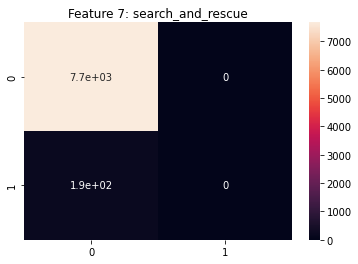

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7673
           1       0.00      0.00      0.00       192

    accuracy                           0.98      7865
   macro avg       0.49      0.50      0.49      7865
weighted avg       0.95      0.98      0.96      7865



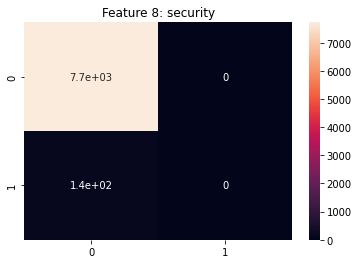

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7721
           1       0.00      0.00      0.00       144

    accuracy                           0.98      7865
   macro avg       0.49      0.50      0.50      7865
weighted avg       0.96      0.98      0.97      7865



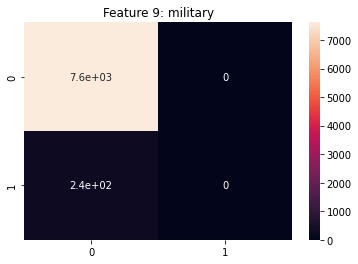

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7620
           1       0.00      0.00      0.00       245

    accuracy                           0.97      7865
   macro avg       0.48      0.50      0.49      7865
weighted avg       0.94      0.97      0.95      7865



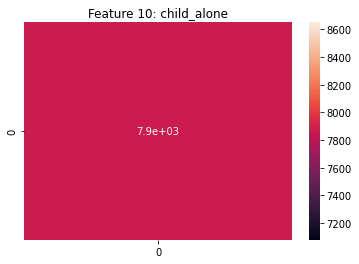

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7865

    accuracy                           1.00      7865
   macro avg       1.00      1.00      1.00      7865
weighted avg       1.00      1.00      1.00      7865



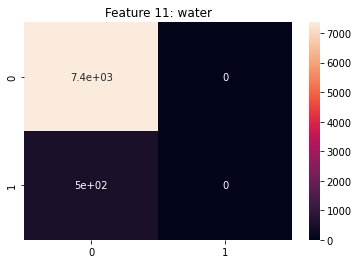

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7365
           1       0.00      0.00      0.00       500

    accuracy                           0.94      7865
   macro avg       0.47      0.50      0.48      7865
weighted avg       0.88      0.94      0.91      7865



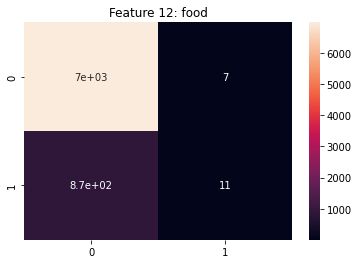

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6987
           1       0.61      0.01      0.02       878

    accuracy                           0.89      7865
   macro avg       0.75      0.51      0.48      7865
weighted avg       0.86      0.89      0.84      7865



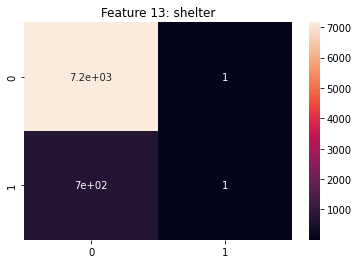

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      7160
           1       0.50      0.00      0.00       705

    accuracy                           0.91      7865
   macro avg       0.71      0.50      0.48      7865
weighted avg       0.87      0.91      0.87      7865



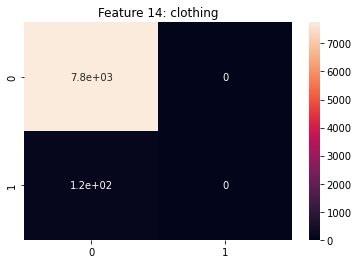

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7750
           1       0.00      0.00      0.00       115

    accuracy                           0.99      7865
   macro avg       0.49      0.50      0.50      7865
weighted avg       0.97      0.99      0.98      7865



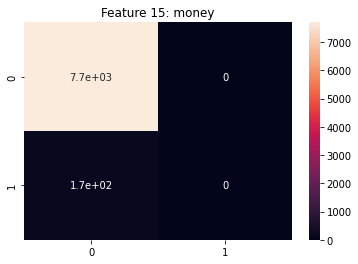

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7695
           1       0.00      0.00      0.00       170

    accuracy                           0.98      7865
   macro avg       0.49      0.50      0.49      7865
weighted avg       0.96      0.98      0.97      7865



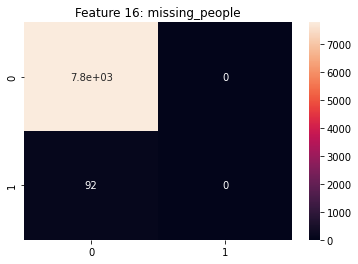

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7773
           1       0.00      0.00      0.00        92

    accuracy                           0.99      7865
   macro avg       0.49      0.50      0.50      7865
weighted avg       0.98      0.99      0.98      7865



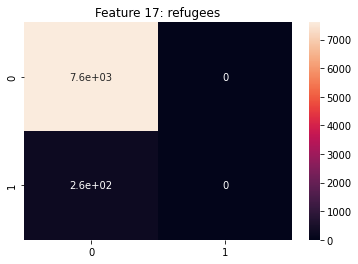

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7605
           1       0.00      0.00      0.00       260

    accuracy                           0.97      7865
   macro avg       0.48      0.50      0.49      7865
weighted avg       0.93      0.97      0.95      7865



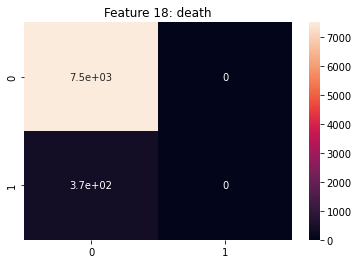

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      7499
           1       0.00      0.00      0.00       366

    accuracy                           0.95      7865
   macro avg       0.48      0.50      0.49      7865
weighted avg       0.91      0.95      0.93      7865



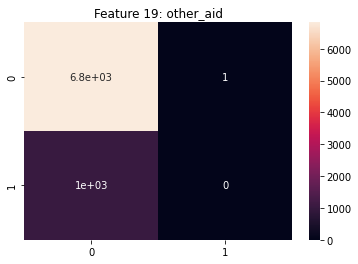

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      6832
           1       0.00      0.00      0.00      1033

    accuracy                           0.87      7865
   macro avg       0.43      0.50      0.46      7865
weighted avg       0.75      0.87      0.81      7865



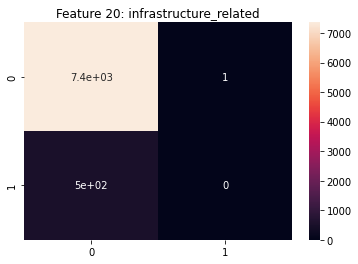

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7360
           1       0.00      0.00      0.00       505

    accuracy                           0.94      7865
   macro avg       0.47      0.50      0.48      7865
weighted avg       0.88      0.94      0.90      7865



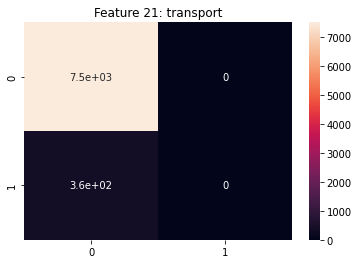

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      7503
           1       0.00      0.00      0.00       362

    accuracy                           0.95      7865
   macro avg       0.48      0.50      0.49      7865
weighted avg       0.91      0.95      0.93      7865



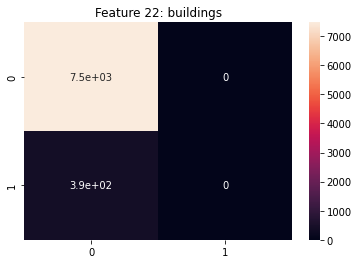

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7473
           1       0.00      0.00      0.00       392

    accuracy                           0.95      7865
   macro avg       0.48      0.50      0.49      7865
weighted avg       0.90      0.95      0.93      7865



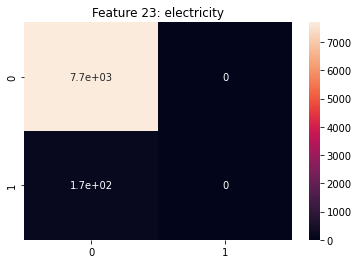

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7697
           1       0.00      0.00      0.00       168

    accuracy                           0.98      7865
   macro avg       0.49      0.50      0.49      7865
weighted avg       0.96      0.98      0.97      7865



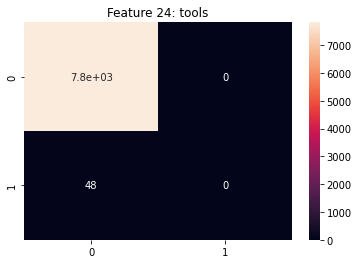

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7817
           1       0.00      0.00      0.00        48

    accuracy                           0.99      7865
   macro avg       0.50      0.50      0.50      7865
weighted avg       0.99      0.99      0.99      7865



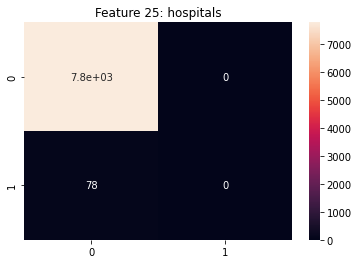

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7787
           1       0.00      0.00      0.00        78

    accuracy                           0.99      7865
   macro avg       0.50      0.50      0.50      7865
weighted avg       0.98      0.99      0.99      7865



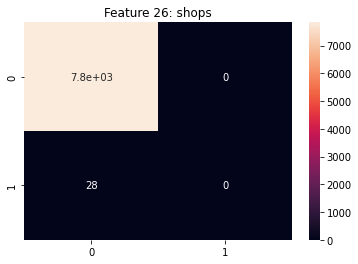

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7837
           1       0.00      0.00      0.00        28

    accuracy                           1.00      7865
   macro avg       0.50      0.50      0.50      7865
weighted avg       0.99      1.00      0.99      7865



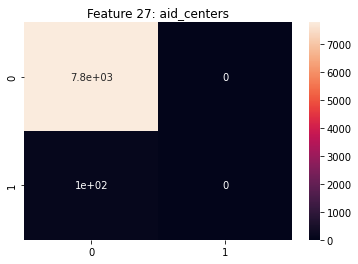

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7762
           1       0.00      0.00      0.00       103

    accuracy                           0.99      7865
   macro avg       0.49      0.50      0.50      7865
weighted avg       0.97      0.99      0.98      7865



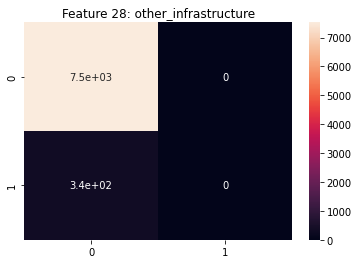

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7524
           1       0.00      0.00      0.00       341

    accuracy                           0.96      7865
   macro avg       0.48      0.50      0.49      7865
weighted avg       0.92      0.96      0.94      7865



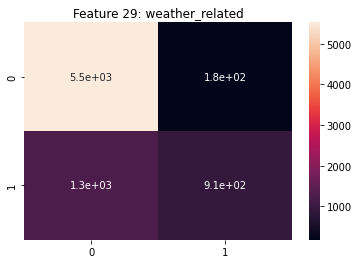

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5702
           1       0.84      0.42      0.56      2163

    accuracy                           0.82      7865
   macro avg       0.83      0.69      0.72      7865
weighted avg       0.82      0.82      0.80      7865



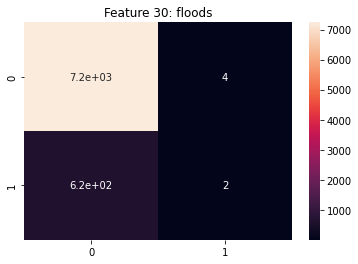

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7242
           1       0.33      0.00      0.01       623

    accuracy                           0.92      7865
   macro avg       0.63      0.50      0.48      7865
weighted avg       0.87      0.92      0.88      7865



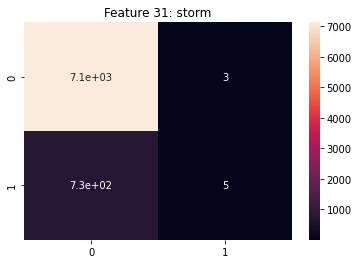

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      7127
           1       0.62      0.01      0.01       738

    accuracy                           0.91      7865
   macro avg       0.77      0.50      0.48      7865
weighted avg       0.88      0.91      0.86      7865



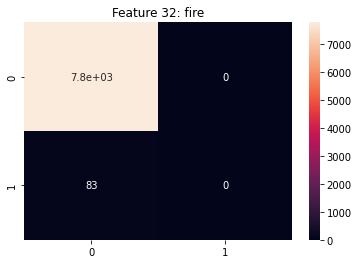

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7782
           1       0.00      0.00      0.00        83

    accuracy                           0.99      7865
   macro avg       0.49      0.50      0.50      7865
weighted avg       0.98      0.99      0.98      7865



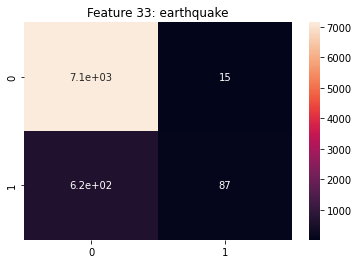

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7163
           1       0.85      0.12      0.22       702

    accuracy                           0.92      7865
   macro avg       0.89      0.56      0.59      7865
weighted avg       0.91      0.92      0.89      7865



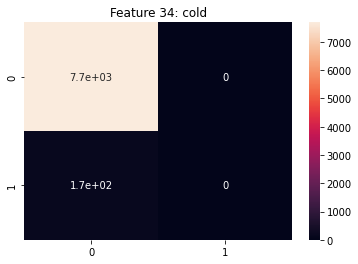

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7694
           1       0.00      0.00      0.00       171

    accuracy                           0.98      7865
   macro avg       0.49      0.50      0.49      7865
weighted avg       0.96      0.98      0.97      7865



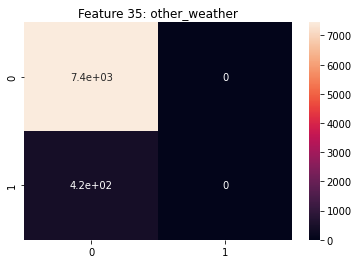

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7450
           1       0.00      0.00      0.00       415

    accuracy                           0.95      7865
   macro avg       0.47      0.50      0.49      7865
weighted avg       0.90      0.95      0.92      7865



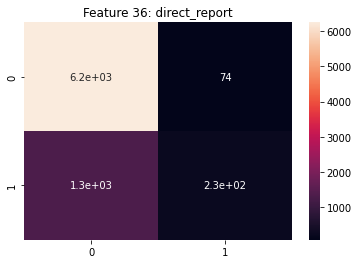

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      6321
           1       0.75      0.15      0.25      1544

    accuracy                           0.82      7865
   macro avg       0.79      0.57      0.57      7865
weighted avg       0.81      0.82      0.77      7865

accuracy: 0.9357314402768948


In [77]:
y_pred = pipeline_nb.predict(X_test)
plot_scores(y_test, y_pred)

**Naive Bayes Accuracy:** 0.935

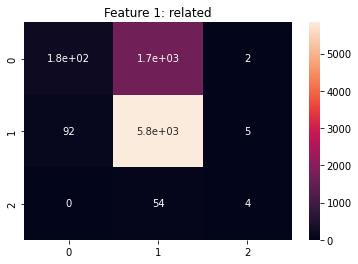

              precision    recall  f1-score   support

           0       0.67      0.10      0.17      1873
           1       0.77      0.98      0.86      5934
           2       0.36      0.07      0.12        58

    accuracy                           0.77      7865
   macro avg       0.60      0.38      0.38      7865
weighted avg       0.74      0.77      0.69      7865



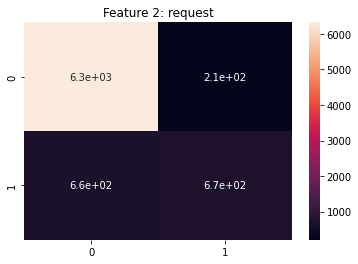

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6533
           1       0.76      0.50      0.61      1332

    accuracy                           0.89      7865
   macro avg       0.83      0.74      0.77      7865
weighted avg       0.88      0.89      0.88      7865



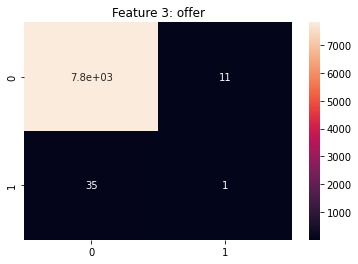

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7829
           1       0.08      0.03      0.04        36

    accuracy                           0.99      7865
   macro avg       0.54      0.51      0.52      7865
weighted avg       0.99      0.99      0.99      7865



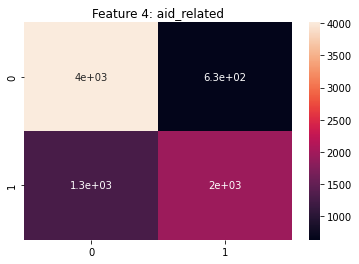

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      4646
           1       0.76      0.61      0.67      3219

    accuracy                           0.76      7865
   macro avg       0.76      0.74      0.74      7865
weighted avg       0.76      0.76      0.75      7865



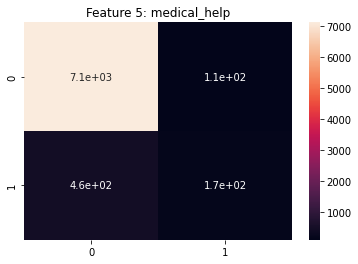

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7227
           1       0.60      0.27      0.37       638

    accuracy                           0.93      7865
   macro avg       0.77      0.63      0.67      7865
weighted avg       0.91      0.93      0.91      7865



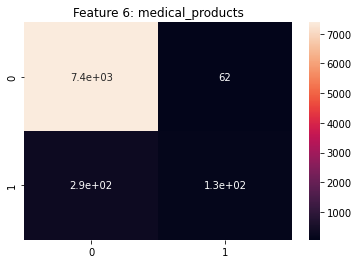

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7447
           1       0.67      0.30      0.42       418

    accuracy                           0.95      7865
   macro avg       0.82      0.65      0.70      7865
weighted avg       0.95      0.95      0.95      7865



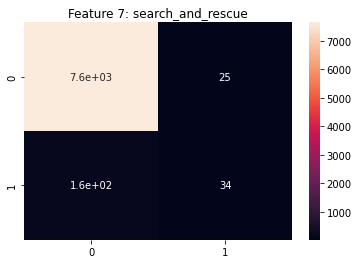

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7673
           1       0.58      0.18      0.27       192

    accuracy                           0.98      7865
   macro avg       0.78      0.59      0.63      7865
weighted avg       0.97      0.98      0.97      7865



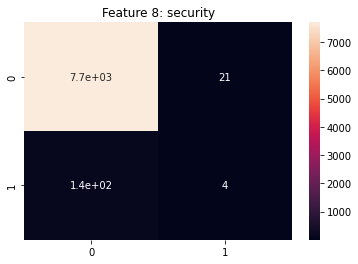

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7721
           1       0.16      0.03      0.05       144

    accuracy                           0.98      7865
   macro avg       0.57      0.51      0.52      7865
weighted avg       0.97      0.98      0.97      7865



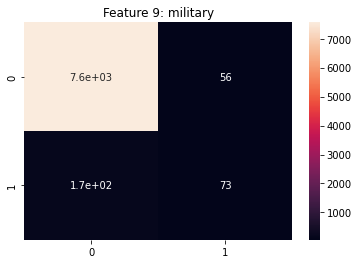

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7620
           1       0.57      0.30      0.39       245

    accuracy                           0.97      7865
   macro avg       0.77      0.65      0.69      7865
weighted avg       0.96      0.97      0.97      7865



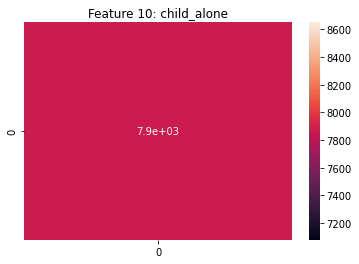

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7865

    accuracy                           1.00      7865
   macro avg       1.00      1.00      1.00      7865
weighted avg       1.00      1.00      1.00      7865



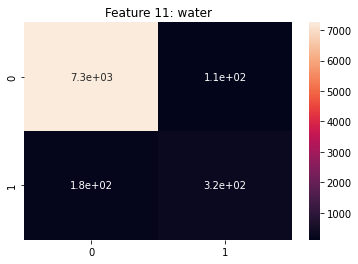

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7365
           1       0.75      0.64      0.69       500

    accuracy                           0.96      7865
   macro avg       0.86      0.81      0.84      7865
weighted avg       0.96      0.96      0.96      7865



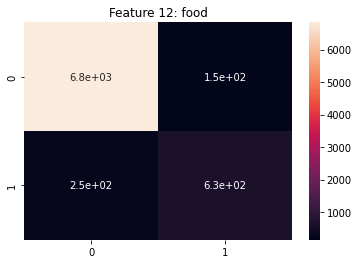

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      6987
           1       0.81      0.72      0.76       878

    accuracy                           0.95      7865
   macro avg       0.89      0.85      0.87      7865
weighted avg       0.95      0.95      0.95      7865



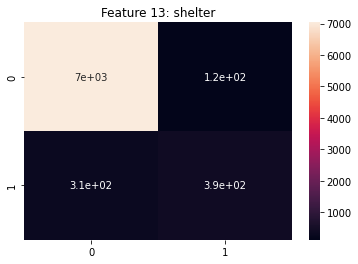

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7160
           1       0.77      0.56      0.65       705

    accuracy                           0.95      7865
   macro avg       0.86      0.77      0.81      7865
weighted avg       0.94      0.95      0.94      7865



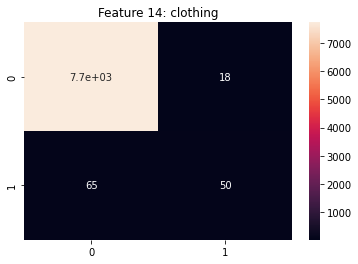

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7750
           1       0.74      0.43      0.55       115

    accuracy                           0.99      7865
   macro avg       0.86      0.72      0.77      7865
weighted avg       0.99      0.99      0.99      7865



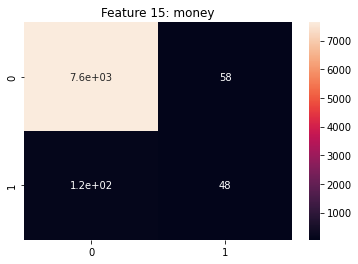

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7695
           1       0.45      0.28      0.35       170

    accuracy                           0.98      7865
   macro avg       0.72      0.64      0.67      7865
weighted avg       0.97      0.98      0.97      7865



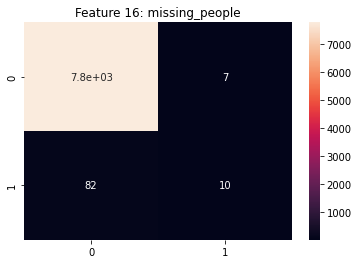

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7773
           1       0.59      0.11      0.18        92

    accuracy                           0.99      7865
   macro avg       0.79      0.55      0.59      7865
weighted avg       0.98      0.99      0.98      7865



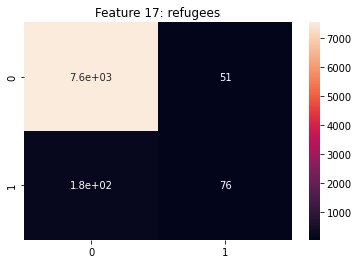

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7605
           1       0.60      0.29      0.39       260

    accuracy                           0.97      7865
   macro avg       0.79      0.64      0.69      7865
weighted avg       0.96      0.97      0.97      7865



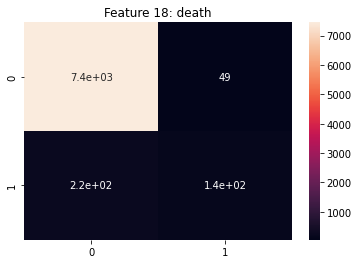

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7499
           1       0.74      0.39      0.51       366

    accuracy                           0.97      7865
   macro avg       0.86      0.69      0.75      7865
weighted avg       0.96      0.97      0.96      7865



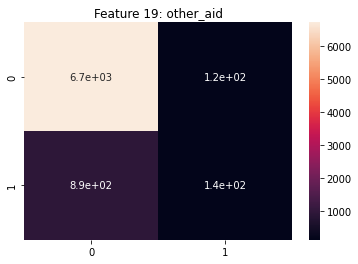

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6832
           1       0.55      0.14      0.22      1033

    accuracy                           0.87      7865
   macro avg       0.71      0.56      0.57      7865
weighted avg       0.84      0.87      0.84      7865



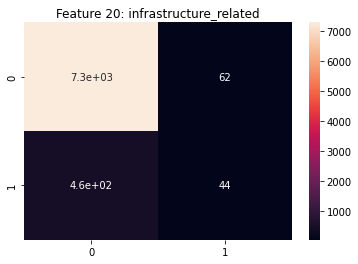

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      7360
           1       0.42      0.09      0.14       505

    accuracy                           0.93      7865
   macro avg       0.68      0.54      0.55      7865
weighted avg       0.91      0.93      0.91      7865



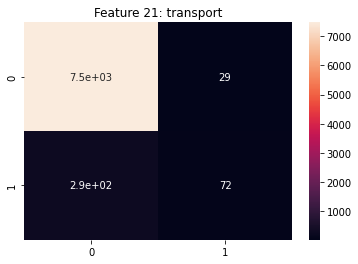

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7503
           1       0.71      0.20      0.31       362

    accuracy                           0.96      7865
   macro avg       0.84      0.60      0.65      7865
weighted avg       0.95      0.96      0.95      7865



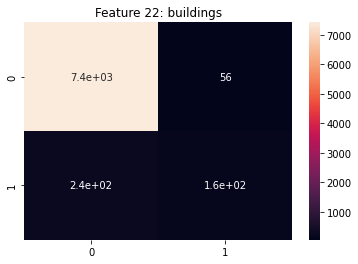

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7473
           1       0.74      0.40      0.52       392

    accuracy                           0.96      7865
   macro avg       0.85      0.70      0.75      7865
weighted avg       0.96      0.96      0.96      7865



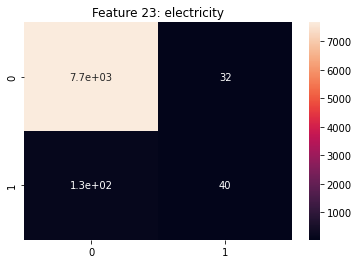

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7697
           1       0.56      0.24      0.33       168

    accuracy                           0.98      7865
   macro avg       0.77      0.62      0.66      7865
weighted avg       0.97      0.98      0.98      7865



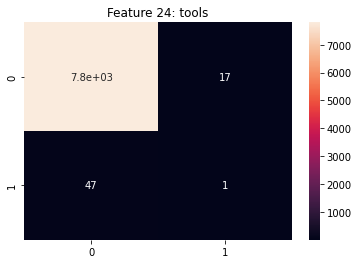

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7817
           1       0.06      0.02      0.03        48

    accuracy                           0.99      7865
   macro avg       0.52      0.51      0.51      7865
weighted avg       0.99      0.99      0.99      7865



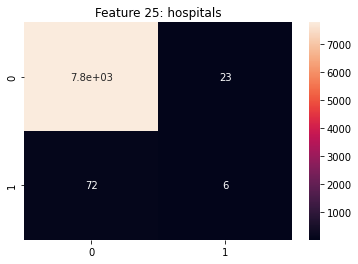

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7787
           1       0.21      0.08      0.11        78

    accuracy                           0.99      7865
   macro avg       0.60      0.54      0.55      7865
weighted avg       0.98      0.99      0.99      7865



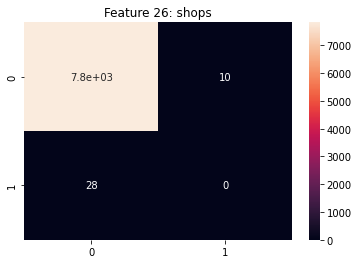

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7837
           1       0.00      0.00      0.00        28

    accuracy                           1.00      7865
   macro avg       0.50      0.50      0.50      7865
weighted avg       0.99      1.00      0.99      7865



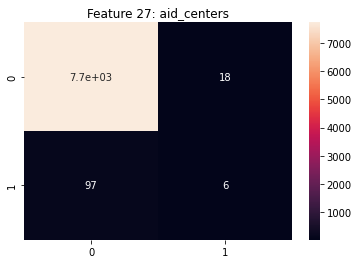

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7762
           1       0.25      0.06      0.09       103

    accuracy                           0.99      7865
   macro avg       0.62      0.53      0.54      7865
weighted avg       0.98      0.99      0.98      7865



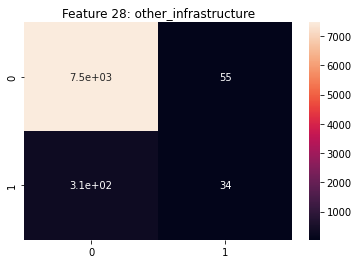

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7524
           1       0.38      0.10      0.16       341

    accuracy                           0.95      7865
   macro avg       0.67      0.55      0.57      7865
weighted avg       0.94      0.95      0.94      7865



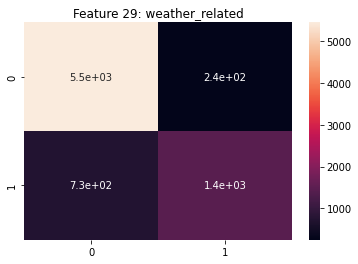

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5702
           1       0.85      0.66      0.75      2163

    accuracy                           0.88      7865
   macro avg       0.87      0.81      0.83      7865
weighted avg       0.87      0.88      0.87      7865



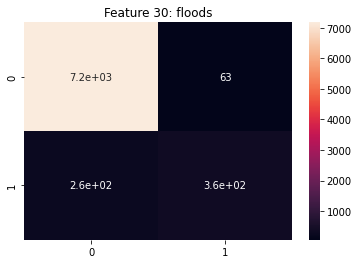

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7242
           1       0.85      0.58      0.69       623

    accuracy                           0.96      7865
   macro avg       0.91      0.78      0.83      7865
weighted avg       0.96      0.96      0.95      7865



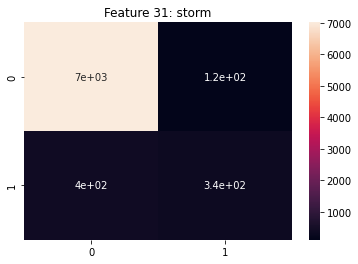

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7127
           1       0.74      0.46      0.57       738

    accuracy                           0.93      7865
   macro avg       0.85      0.72      0.77      7865
weighted avg       0.93      0.93      0.93      7865



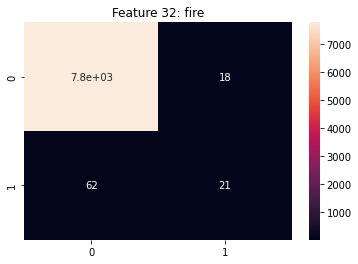

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7782
           1       0.54      0.25      0.34        83

    accuracy                           0.99      7865
   macro avg       0.77      0.63      0.67      7865
weighted avg       0.99      0.99      0.99      7865



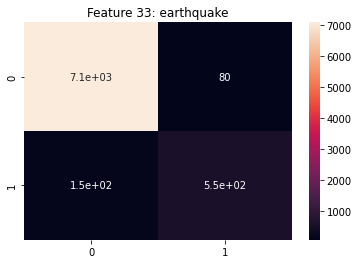

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7163
           1       0.87      0.79      0.83       702

    accuracy                           0.97      7865
   macro avg       0.93      0.89      0.91      7865
weighted avg       0.97      0.97      0.97      7865



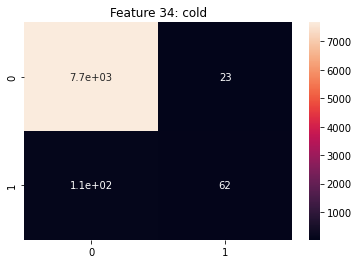

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7694
           1       0.73      0.36      0.48       171

    accuracy                           0.98      7865
   macro avg       0.86      0.68      0.74      7865
weighted avg       0.98      0.98      0.98      7865



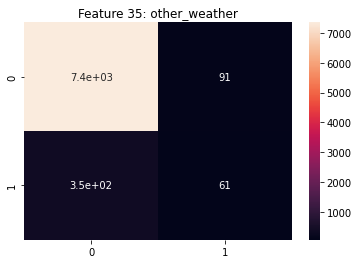

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7450
           1       0.40      0.15      0.22       415

    accuracy                           0.94      7865
   macro avg       0.68      0.57      0.59      7865
weighted avg       0.92      0.94      0.93      7865



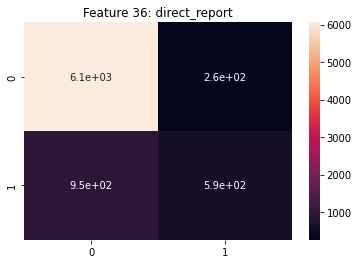

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      6321
           1       0.69      0.38      0.49      1544

    accuracy                           0.85      7865
   macro avg       0.78      0.67      0.70      7865
weighted avg       0.83      0.85      0.83      7865

accuracy: 0.9469379105742742


In [79]:
y_pred = pipeline_ab.predict(X_test)
plot_scores(y_test, y_pred)

**AdaBoost accuracy:** 0.946

### 6. Hyperparameter tuning to increase pipeline performance

In [93]:
pipeline_ab.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vect', 'tfidf', 'moc', 'vect__analyzer', 'vect__binary', 'vect__decode_error', 'vect__dtype', 'vect__encoding', 'vect__input', 'vect__lowercase', 'vect__max_df', 'vect__max_features', 'vect__min_df', 'vect__ngram_range', 'vect__preprocessor', 'vect__stop_words', 'vect__strip_accents', 'vect__token_pattern', 'vect__tokenizer', 'vect__vocabulary', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'moc__estimator__algorithm', 'moc__estimator__base_estimator', 'moc__estimator__learning_rate', 'moc__estimator__n_estimators', 'moc__estimator__random_state', 'moc__estimator', 'moc__n_jobs'])

In [97]:
parameters_ab = {
        'tfidf__use_idf': (True, False),
        'moc__estimator__n_estimators': [50, 60, 70]
}

cv_ab = GridSearchCV(pipeline_ab, param_grid=parameters_ab)
cv_ab.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('vect',
                                        CountVectorizer(tokenizer=<function tokenize at 0x7fa0ca7c8310>)),
                                       ('tfidf', TfidfTransformer()),
                                       ('moc',
                                        MultiOutputClassifier(estimator=AdaBoostClassifier()))]),
             param_grid={'moc__estimator__n_estimators': [50, 60, 70],
                         'tfidf__use_idf': (True, False)})

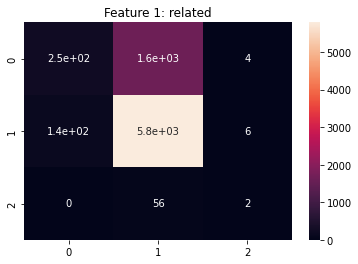

              precision    recall  f1-score   support

           0       0.64      0.13      0.22      1873
           1       0.78      0.98      0.86      5934
           2       0.17      0.03      0.06        58

    accuracy                           0.77      7865
   macro avg       0.53      0.38      0.38      7865
weighted avg       0.74      0.77      0.70      7865



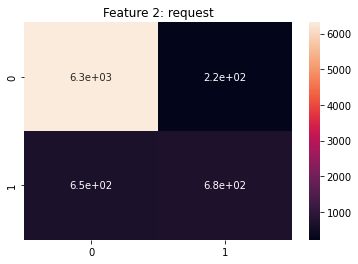

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6533
           1       0.76      0.51      0.61      1332

    accuracy                           0.89      7865
   macro avg       0.83      0.74      0.77      7865
weighted avg       0.88      0.89      0.88      7865



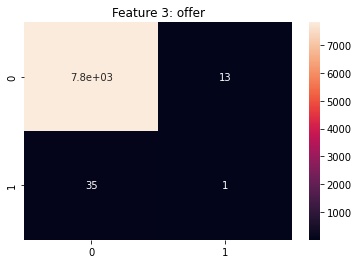

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7829
           1       0.07      0.03      0.04        36

    accuracy                           0.99      7865
   macro avg       0.53      0.51      0.52      7865
weighted avg       0.99      0.99      0.99      7865



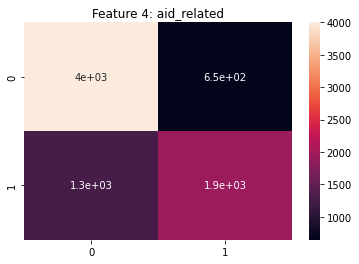

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      4646
           1       0.75      0.61      0.67      3219

    accuracy                           0.76      7865
   macro avg       0.76      0.73      0.74      7865
weighted avg       0.76      0.76      0.75      7865



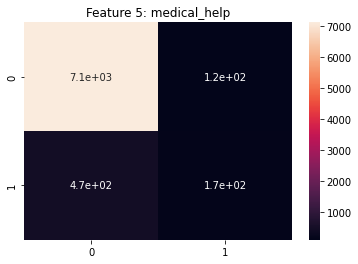

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7227
           1       0.58      0.26      0.36       638

    accuracy                           0.93      7865
   macro avg       0.76      0.62      0.66      7865
weighted avg       0.91      0.93      0.91      7865



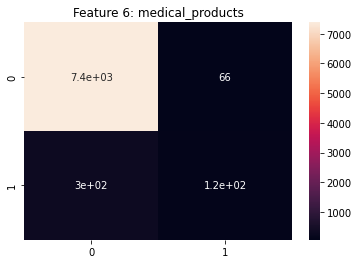

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7447
           1       0.65      0.29      0.40       418

    accuracy                           0.95      7865
   macro avg       0.80      0.64      0.69      7865
weighted avg       0.94      0.95      0.95      7865



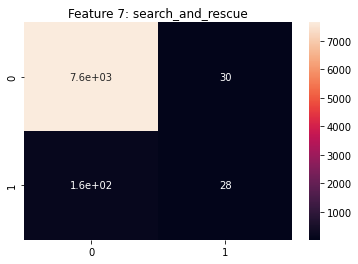

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7673
           1       0.48      0.15      0.22       192

    accuracy                           0.98      7865
   macro avg       0.73      0.57      0.61      7865
weighted avg       0.97      0.98      0.97      7865



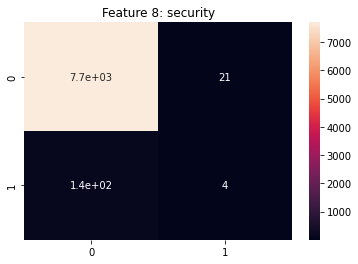

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7721
           1       0.16      0.03      0.05       144

    accuracy                           0.98      7865
   macro avg       0.57      0.51      0.52      7865
weighted avg       0.97      0.98      0.97      7865



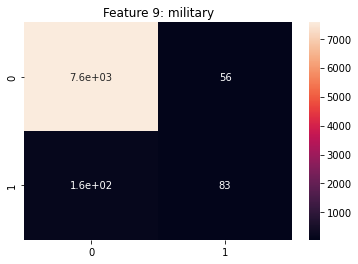

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7620
           1       0.60      0.34      0.43       245

    accuracy                           0.97      7865
   macro avg       0.79      0.67      0.71      7865
weighted avg       0.97      0.97      0.97      7865



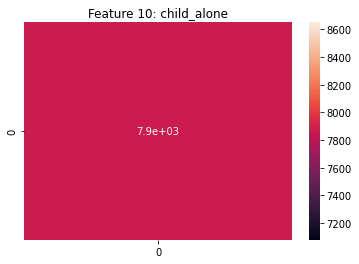

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7865

    accuracy                           1.00      7865
   macro avg       1.00      1.00      1.00      7865
weighted avg       1.00      1.00      1.00      7865



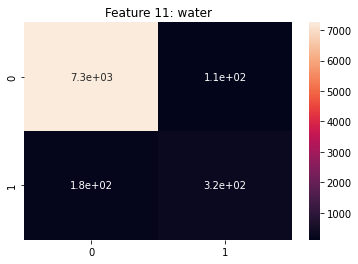

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7365
           1       0.75      0.64      0.69       500

    accuracy                           0.96      7865
   macro avg       0.86      0.81      0.83      7865
weighted avg       0.96      0.96      0.96      7865



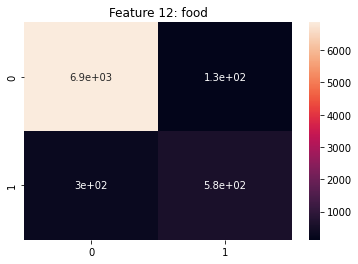

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6987
           1       0.82      0.66      0.73       878

    accuracy                           0.95      7865
   macro avg       0.89      0.82      0.85      7865
weighted avg       0.94      0.95      0.94      7865



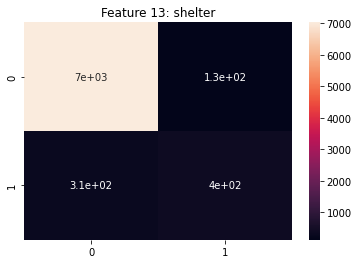

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7160
           1       0.75      0.56      0.64       705

    accuracy                           0.94      7865
   macro avg       0.86      0.77      0.81      7865
weighted avg       0.94      0.94      0.94      7865



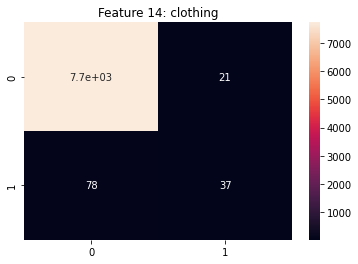

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7750
           1       0.64      0.32      0.43       115

    accuracy                           0.99      7865
   macro avg       0.81      0.66      0.71      7865
weighted avg       0.98      0.99      0.99      7865



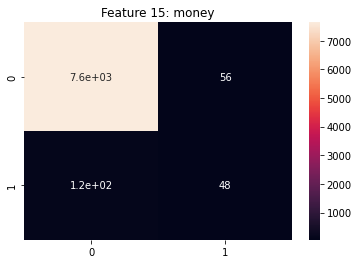

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7695
           1       0.46      0.28      0.35       170

    accuracy                           0.98      7865
   macro avg       0.72      0.64      0.67      7865
weighted avg       0.97      0.98      0.97      7865



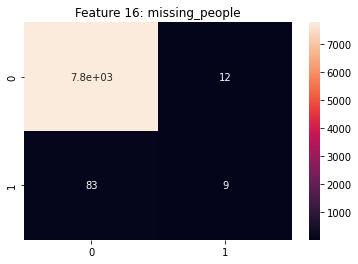

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7773
           1       0.43      0.10      0.16        92

    accuracy                           0.99      7865
   macro avg       0.71      0.55      0.58      7865
weighted avg       0.98      0.99      0.98      7865



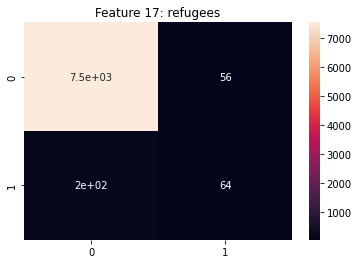

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7605
           1       0.53      0.25      0.34       260

    accuracy                           0.97      7865
   macro avg       0.75      0.62      0.66      7865
weighted avg       0.96      0.97      0.96      7865



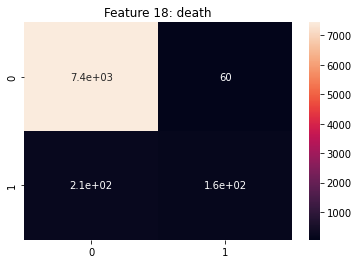

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7499
           1       0.72      0.42      0.53       366

    accuracy                           0.97      7865
   macro avg       0.85      0.71      0.76      7865
weighted avg       0.96      0.97      0.96      7865



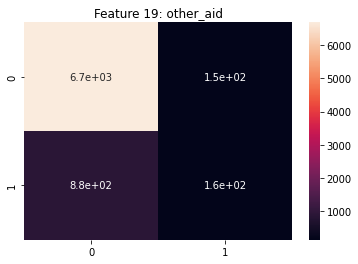

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6832
           1       0.52      0.15      0.23      1033

    accuracy                           0.87      7865
   macro avg       0.70      0.57      0.58      7865
weighted avg       0.84      0.87      0.84      7865



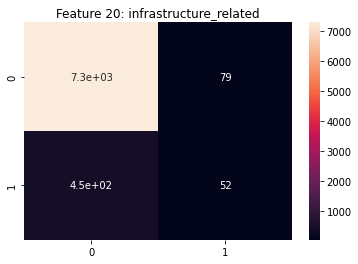

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      7360
           1       0.40      0.10      0.16       505

    accuracy                           0.93      7865
   macro avg       0.67      0.55      0.56      7865
weighted avg       0.91      0.93      0.91      7865



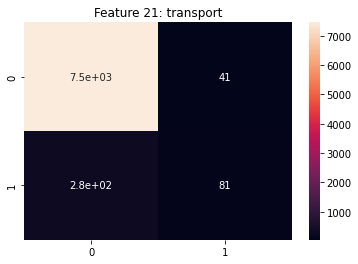

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7503
           1       0.66      0.22      0.33       362

    accuracy                           0.96      7865
   macro avg       0.81      0.61      0.66      7865
weighted avg       0.95      0.96      0.95      7865



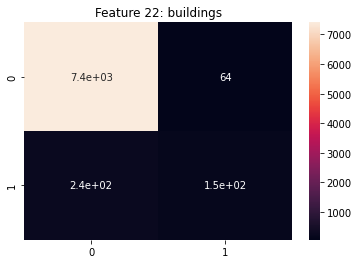

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7473
           1       0.71      0.39      0.50       392

    accuracy                           0.96      7865
   macro avg       0.84      0.69      0.74      7865
weighted avg       0.96      0.96      0.96      7865



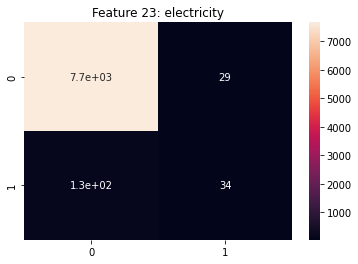

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7697
           1       0.54      0.20      0.29       168

    accuracy                           0.98      7865
   macro avg       0.76      0.60      0.64      7865
weighted avg       0.97      0.98      0.97      7865



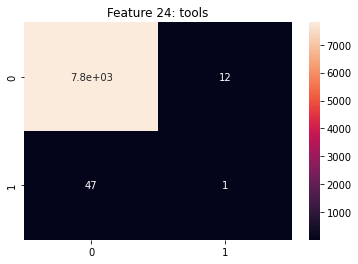

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7817
           1       0.08      0.02      0.03        48

    accuracy                           0.99      7865
   macro avg       0.54      0.51      0.51      7865
weighted avg       0.99      0.99      0.99      7865



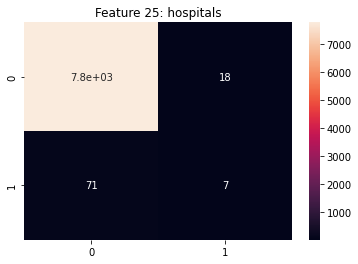

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7787
           1       0.28      0.09      0.14        78

    accuracy                           0.99      7865
   macro avg       0.64      0.54      0.57      7865
weighted avg       0.98      0.99      0.99      7865



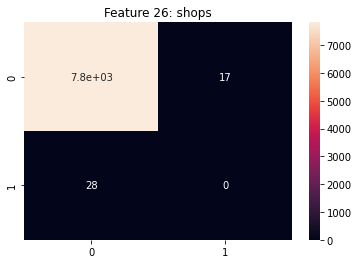

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7837
           1       0.00      0.00      0.00        28

    accuracy                           0.99      7865
   macro avg       0.50      0.50      0.50      7865
weighted avg       0.99      0.99      0.99      7865



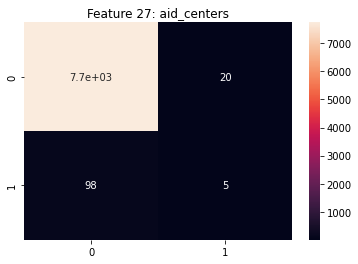

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7762
           1       0.20      0.05      0.08       103

    accuracy                           0.98      7865
   macro avg       0.59      0.52      0.54      7865
weighted avg       0.98      0.98      0.98      7865



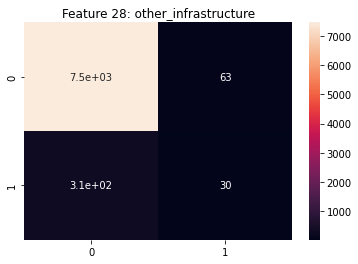

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7524
           1       0.32      0.09      0.14       341

    accuracy                           0.95      7865
   macro avg       0.64      0.54      0.56      7865
weighted avg       0.93      0.95      0.94      7865



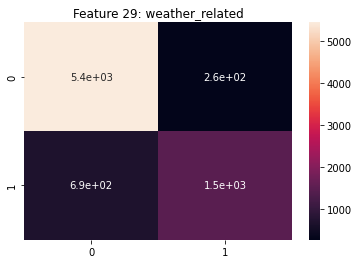

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5702
           1       0.85      0.68      0.76      2163

    accuracy                           0.88      7865
   macro avg       0.87      0.82      0.84      7865
weighted avg       0.88      0.88      0.87      7865



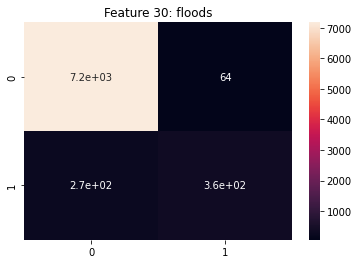

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7242
           1       0.85      0.57      0.68       623

    accuracy                           0.96      7865
   macro avg       0.91      0.78      0.83      7865
weighted avg       0.95      0.96      0.95      7865



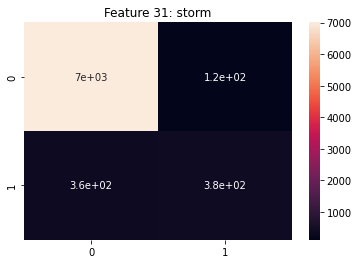

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7127
           1       0.76      0.51      0.61       738

    accuracy                           0.94      7865
   macro avg       0.85      0.75      0.79      7865
weighted avg       0.93      0.94      0.93      7865



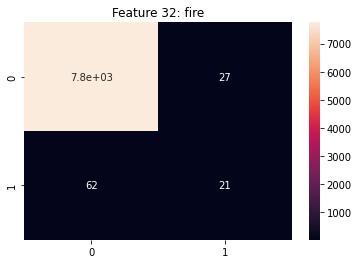

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7782
           1       0.44      0.25      0.32        83

    accuracy                           0.99      7865
   macro avg       0.71      0.62      0.66      7865
weighted avg       0.99      0.99      0.99      7865



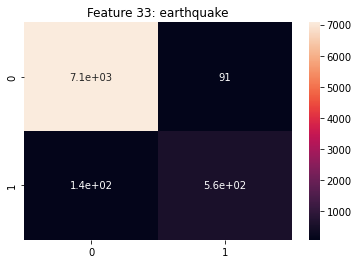

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7163
           1       0.86      0.80      0.83       702

    accuracy                           0.97      7865
   macro avg       0.92      0.89      0.91      7865
weighted avg       0.97      0.97      0.97      7865



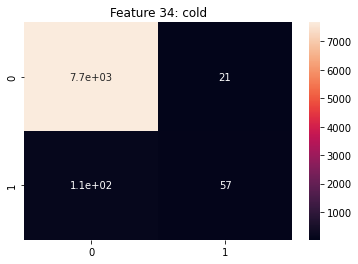

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7694
           1       0.73      0.33      0.46       171

    accuracy                           0.98      7865
   macro avg       0.86      0.67      0.72      7865
weighted avg       0.98      0.98      0.98      7865



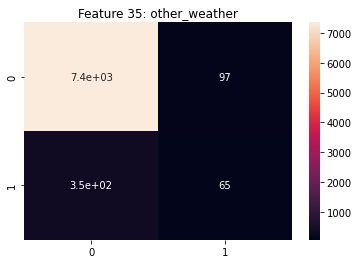

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7450
           1       0.40      0.16      0.23       415

    accuracy                           0.94      7865
   macro avg       0.68      0.57      0.60      7865
weighted avg       0.93      0.94      0.93      7865



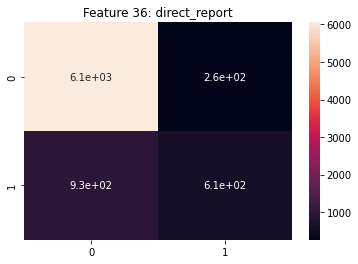

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6321
           1       0.70      0.40      0.51      1544

    accuracy                           0.85      7865
   macro avg       0.78      0.68      0.71      7865
weighted avg       0.83      0.85      0.83      7865

accuracy: 0.9465811965811965


In [98]:
y_pred = cv_ab.predict(X_test)
plot_scores(y_test, y_pred)